In [14]:
# import libraries
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from utils import *
from network import *

%matplotlib inline
np.random.seed(1)

In [2]:
# loading training and test sets
train_orig = pd.read_csv('../input/original_mnist/train.csv')
test = pd.read_csv('../input/original_mnist/test.csv')

In [3]:
# displaying the training set
train_orig

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# displaying the test set
test

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# randomly shuffle training data and create the dev set

train_shuffled = train_orig.iloc[np.random.permutation(train_orig.shape[0])]
train = train_shuffled.iloc[:50000, :]
dev = train_shuffled.iloc[50000:, :]

In [6]:
n = train.shape[1] - 1  # number of features
m_train = train.shape[0]  # number of training examples
m_dev = dev.shape[0]  # number of examples in dev set
m_test = test.shape[0]  # number of examples in test set
print(n, m_train, m_dev, m_test)

784 50000 10000 10000


In [7]:
# Separate features from labels

X_train = np.array(train.loc[:, 'pixel0':].T).reshape(n, m_train)
Y_train = np.array(train['label'].T).reshape(1, m_train)
X_dev = np.array(dev.loc[:, 'pixel0':].T).reshape(n, m_dev)
Y_dev = np.array(dev['label'].T).reshape(1, m_dev)
X_test = np.array(test.loc[:, 'pixel0':].T).reshape(n, m_test)
Y_test = np.array(test['label'].T).reshape(1, m_test)

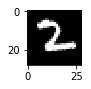

In [8]:
# visualize images (change index to visualize other images)

index = 1
h, w = (28, 28)
plt.figure(figsize=(1, 1))
data = np.array(X_train[:, index].reshape(h, w), dtype=np.uint8)
img = Image.fromarray(data, mode='L')  # mode='L' for 8-bit pixels, black and white
plt.imshow(img, cmap='gray')

In [9]:
# convert Y_train to equivalent one_hot_encoding

Y_train_one_hot = one_hot_encoding(Y_train, 10)  # num_of_output_units = 10
print(Y_train_one_hot.shape)

(10, 50000)


In [15]:
# create a neural network

nn = network([X_train.shape[0], 10, 10], X_train, Y_train_one_hot)

In [11]:
# gradient descent

nn.nn_model(learning_rate=0.0001, num_iter=1000)

Iteration 0 : 61.6044768402
Iteration 1 : 12.539637062
Iteration 2 : 10.4292769368
Iteration 3 : 8.39486406687
Iteration 4 : 6.44801228205
Iteration 5 : 4.72898430898
Iteration 6 : 3.69878258308
Iteration 7 : 3.31607388804
Iteration 8 : 3.17612442478
Iteration 9 : 3.16900468483
Iteration 10 : 3.14640335426
Iteration 11 : 3.15363216008
Iteration 12 : 3.13001324406
Iteration 13 : 3.13995170466
Iteration 14 : 3.11574061045
Iteration 15 : 3.12748772874
Iteration 16 : 3.10306332254
Iteration 17 : 3.11616368783
Iteration 18 : 3.0917056698
Iteration 19 : 3.1058322575
Iteration 20 : 3.08146015921
Iteration 21 : 3.09635364787
Iteration 22 : 3.07216059672
Iteration 23 : 3.08760976557
Iteration 24 : 3.06367018018
Iteration 25 : 3.07950109619
Iteration 26 : 3.05587480344
Iteration 27 : 3.07194335601
Iteration 28 : 3.04867868099
Iteration 29 : 3.06486492747
Iteration 30 : 3.04200117373
Iteration 31 : 3.05820482265
Iteration 32 : 3.03577432642
Iteration 33 : 3.05191099178
Iteration 34 : 3.0299408532

Iteration 278 : 2.00834819715
Iteration 279 : 2.00404025772
Iteration 280 : 1.99975024277
Iteration 281 : 1.99547812254
Iteration 282 : 1.99122386541
Iteration 283 : 1.9869874396
Iteration 284 : 1.98276881175
Iteration 285 : 1.9785679482
Iteration 286 : 1.97438481393
Iteration 287 : 1.97021937348
Iteration 288 : 1.96607159022
Iteration 289 : 1.96194142701
Iteration 290 : 1.95782884562
Iteration 291 : 1.95373380731
Iteration 292 : 1.94965627234
Iteration 293 : 1.94559620039
Iteration 294 : 1.94155355029
Iteration 295 : 1.93752828021
Iteration 296 : 1.93352034756
Iteration 297 : 1.92952970909
Iteration 298 : 1.92555632083
Iteration 299 : 1.92160013816
Iteration 300 : 1.91766111578
Iteration 301 : 1.91373920777
Iteration 302 : 1.90983436753
Iteration 303 : 1.90594654789
Iteration 304 : 1.90207570102
Iteration 305 : 1.89822177854
Iteration 306 : 1.89438473145
Iteration 307 : 1.89056451022
Iteration 308 : 1.88676106473
Iteration 309 : 1.88297434435
Iteration 310 : 1.87920429788
Iteration 31

Iteration 552 : 1.32296038293
Iteration 553 : 1.32164793123
Iteration 554 : 1.32034056902
Iteration 555 : 1.31903827192
Iteration 556 : 1.31774100817
Iteration 557 : 1.31644876845
Iteration 558 : 1.31516153408
Iteration 559 : 1.31387927084
Iteration 560 : 1.31260195117
Iteration 561 : 1.31132955417
Iteration 562 : 1.3100620534
Iteration 563 : 1.30879943408
Iteration 564 : 1.30754167092
Iteration 565 : 1.30628875496
Iteration 566 : 1.30504066429
Iteration 567 : 1.30379735347
Iteration 568 : 1.30255880405
Iteration 569 : 1.30132499793
Iteration 570 : 1.30009591396
Iteration 571 : 1.29887152501
Iteration 572 : 1.29765183994
Iteration 573 : 1.29643679036
Iteration 574 : 1.29522630796
Iteration 575 : 1.29402043356
Iteration 576 : 1.29281914793
Iteration 577 : 1.29162242935
Iteration 578 : 1.2904302558
Iteration 579 : 1.28924261712
Iteration 580 : 1.28805948442
Iteration 581 : 1.28688084085
Iteration 582 : 1.28570666996
Iteration 583 : 1.28453695016
Iteration 584 : 1.28337165231
Iteration 58

Iteration 826 : 1.0944565939
Iteration 827 : 1.093942214
Iteration 828 : 1.09342928842
Iteration 829 : 1.09291780264
Iteration 830 : 1.09240775363
Iteration 831 : 1.09189913922
Iteration 832 : 1.09139194793
Iteration 833 : 1.09088615354
Iteration 834 : 1.09038173792
Iteration 835 : 1.08987872499
Iteration 836 : 1.08937711344
Iteration 837 : 1.08887686889
Iteration 838 : 1.08837797311
Iteration 839 : 1.08788045354
Iteration 840 : 1.08738430301
Iteration 841 : 1.0868894913
Iteration 842 : 1.08639598352
Iteration 843 : 1.08590383034
Iteration 844 : 1.08541302484
Iteration 845 : 1.08492354645
Iteration 846 : 1.08443538875
Iteration 847 : 1.08394855711
Iteration 848 : 1.08346304427
Iteration 849 : 1.08297883853
Iteration 850 : 1.0824959438
Iteration 851 : 1.08201434587
Iteration 852 : 1.08153404215
Iteration 853 : 1.08105502788
Iteration 854 : 1.08057729676
Iteration 855 : 1.08010080725
Iteration 856 : 1.07962558951
Iteration 857 : 1.07915163834
Iteration 858 : 1.07867894635
Iteration 859 :

In [16]:
# prediction of labels

Y_hat_test_one_hot = nn.predict(X_test);
Y_hat_test = one_hot_decoding(Y_hat_test_one_hot)

AttributeError: 'network' object has no attribute 'predict'

In [ ]:
# generation of output file

generate_output_file(Y_hat_test)